In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

In [3]:
df = pd.read_csv('./embeddings.csv')
df

,image_file,class,bbox_x,bbox_y,bbox_w,bbox_h,embedding_0,embedding_1,embedding_2,embedding_3,...,embedding_54,embedding_55,embedding_56,embedding_57,embedding_58,embedding_59,embedding_60,embedding_61,embedding_62,embedding_63
0,911.jpg,1,0.275920,0.547369,0.056611,0.053112,-0.195665,0.785046,0.572187,-0.110475,...,-0.125275,-0.133054,-0.173448,0.105928,-0.189302,-0.022555,-0.159441,0.158081,0.280868,0.353831
1,911.jpg,1,0.408135,0.545214,0.044710,0.046571,-0.199827,0.613656,0.477559,-0.193948,...,-0.072322,0.058685,-0.154602,0.174257,-0.199088,-0.035932,-0.072200,0.238777,0.472930,0.331208
2,911.jpg,2,0.669571,0.529941,0.202476,0.139773,-0.204418,0.577068,0.232309,-0.204273,...,0.021308,-0.104523,-0.234140,0.128483,-0.142502,-0.054939,-0.153877,0.125548,0.467876,0.011468
3,3114.jpg,1,0.438260,0.669552,0.271132,0.325067,-0.241909,0.426334,0.406572,-0.103499,...,0.031387,-0.164806,-0.243278,0.089795,-0.078691,-0.080725,-0.214558,0.189322,0.426269,0.045355
4,3114.jpg,0,0.778075,0.534759,0.021106,0.059266,-0.114771,0.598210,0.328178,-0.161000,...,-0.019442,0.055938,-0.076297,-0.185972,-0.210127,0.387904,-0.092437,-0.094538,0.585140,0.264674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75690,1813.jpg,1,0.659566,0.577587,0.127722,0.099948,-0.225461,0.423113,0.474197,-0.189053,...,0.021534,-0.045090,-0.242372,0.203351,-0.193212,0.010908,-0.129473,0.212851,0.518437,0.231959
75691,1813.jpg,2,0.385304,0.506124,0.054142,0.082071,-0.148199,0.495748,0.375479,-0.175869,...,-0.010056,-0.031245,-0.126884,0.025845,-0.176839,0.044949,-0.037749,0.181793,0.342931,0.311764
75692,1813.jpg,0,0.573090,0.579736,0.055505,0.151965,-0.190174,0.405552,0.450030,-0.133229,...,0.102110,0.038874,-0.194491,-0.065669,0.123589,0.027469,-0.037107,0.041644,0.614894,0.215321
75693,1813.jpg,1,0.463859,0.521375,0.021255,0.023082,-0.032631,0.879396,0.351528,-0.180249,...,-0.158645,0.414962,0.178296,-0.153202,-0.129796,0.406480,-0.038081,-0.025561,0.502252,0.303858


In [4]:
kmeans = KMeans(n_clusters=len(df['class'].unique()), random_state=0)
kmeans.fit(df.iloc[:, 6:])

KMeans(n_clusters=6, random_state=0)

In [11]:
print(kmeans.labels_)
print(kmeans.inertia_)

[1 1 5 ... 5 1 3]
117251.74678800462


In [19]:
contingency_matrix(df['class'], kmeans.labels_)

array([[10862,   165,  4615,   354,  3819, 17177],
       [  196, 11873,  1427,    50,     7, 16261],
       [   31,  1785,    12,     0,     0,  3984],
       [    0,     0,   251,  1723,     0,   449],
       [    0,     1,     1,     2,     0,   166],
       [    3,    44,   121,    23,     0,   293]])

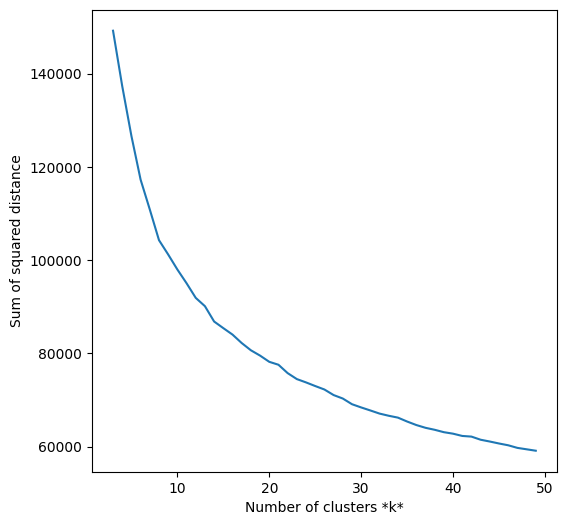

In [12]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(df.iloc[:, 6:])

    sse.append(km.inertia_)

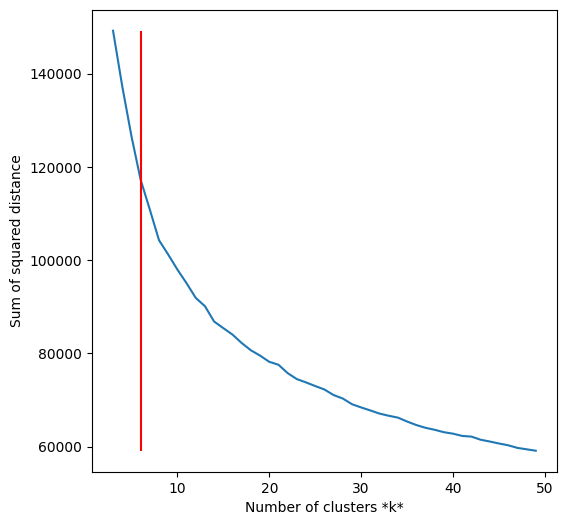

In [16]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.vlines(6, min(sse), max(sse), color='r')
plt.show()